# **Revisão Teórica**





In [1]:
# Bibliotecas
import serial
import numpy as np
import matplotlib.pyplot as plt
import time as t
from scipy.signal import square,sawtooth



Estabelecendo conexão.

Iniciando coleta.

Fim da coleta.
media= 7.1

Período real: 0.02131609618663788
Nivel_DC: 2.215233333333333


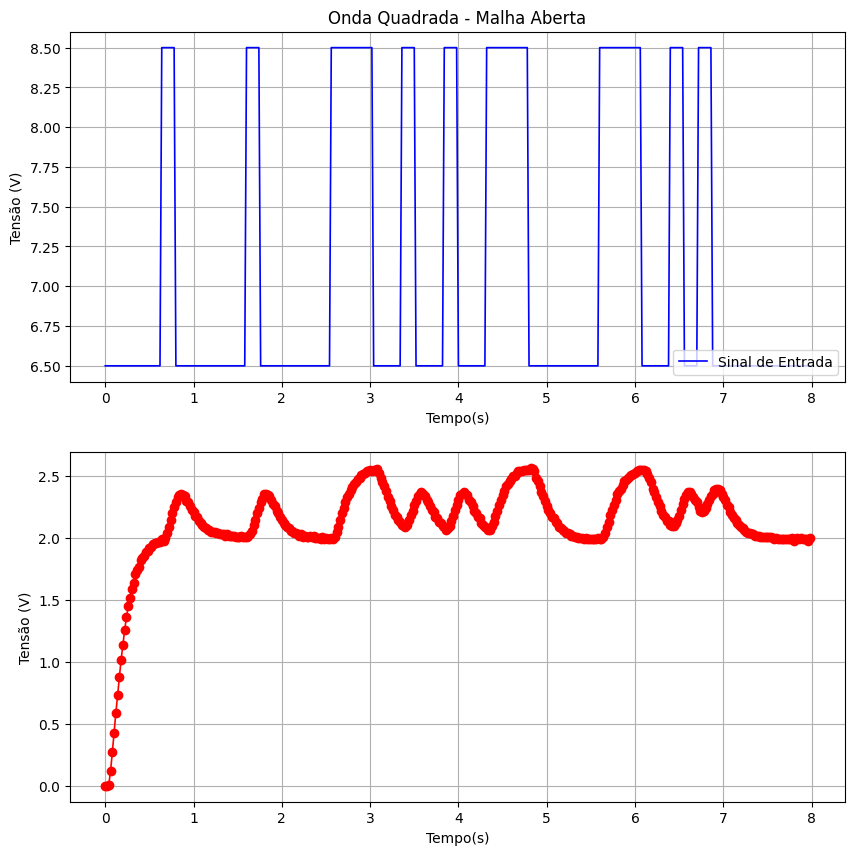

In [5]:
"""
Bancada Motor-Gerador
UFPA - Campus Tucuruí
Monitoria de Sistemas de Controle para Engenharia - PGRAD - MONITORIA 03/2020
Coodenador: Cleison Daniel Silva
Bolsista: Felipe Silveira Piano
Data: 27/09/2020
"""

import serial
import numpy as np
import matplotlib.pyplot as plt
import time as t
from scipy.signal import square, sawtooth


##########################################

numAmostras = 400
tempo = np.zeros(numAmostras)
y = np.zeros(numAmostras)

# Ts = 0.02
# fre = 0.5
# Amplitude = 0.1
# setpoint = 12

Ts = 0.02
fre = 0.5
Amplitude = 0.1
setpoint = 7.5

# a = 2*np.ones(int(numAmostras/2))
# b = 4*np.ones(int(numAmostras/2))
# u = np.concatenate([a,b]) #degrau
r = np.zeros(numAmostras)
toc = np.zeros(numAmostras)
######################


def PRBS(size_min_seq, size):
    rand = np.random.randint(0, 10, size=size)
    prbs = []
    for i in range(size):
        if rand[i] > 5:
            prbs.append(np.ones(size_min_seq))
        else:
            prbs.append(np.zeros(size_min_seq))
    prbs = np.array(prbs).reshape(size*size_min_seq)[0:size]
    return prbs


prbs = PRBS(size_min_seq=2**3, size=400)
# numAmostras = len(prbs)
r = np.zeros(numAmostras)

# tempo = np.linspace(0,4,1024)


for n in range(numAmostras):
    r[n] =  (2*prbs[n] - 1) + setpoint
   # r[n] = Amplitude*square(2*np.pi*fre*n*Ts) + setpoint
    # r[n] = Amplitude*sawtooth(2*np.pi*fre*n*Ts) + setpoint
    # r[n] = Amplitude*np.sin(2*np.pi*fre*n*Ts) + setpoint
    # r[n] = u[n]

print('\nEstabelecendo conexão.')
conexao = serial.Serial(port='COM10', baudrate=9600, timeout=0.005)

t.sleep(1)
print('\nIniciando coleta.')

for n in range(numAmostras):
    tic = t.time()

    if (conexao.inWaiting() > 0):

        y[n] = conexao.readline().decode()

    u = (r[n]*255)/15
    conexao.write(str(round(u)).encode())

    t.sleep(Ts)

    if (n > 0):
        tempo[n] = tempo[n-1] + Ts
    toc[n] = t.time() - tic
conexao.write('0'.encode())
print('\nFim da coleta.')
conexao.close()
print('media=', np.mean(r))

print('\nPeríodo real:', np.mean(toc))
print('Nivel_DC:', np.mean(y[tempo > 2]))

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.plot(tempo, r, '-b', linewidth=1.2)
plt.xlabel('Tempo(s)')
plt.ylabel('Tensão (V)')
plt.grid()
plt.title('Onda Quadrada - Malha Aberta')
plt.legend(loc='lower right', labels=('Sinal de Entrada', 'Sinal de Saída'))


plt.subplot(212)
# plt.plot(tempo,r,'-b',tempo,y,'-r',linewidth=1.2)
plt.plot(tempo, y, '-ro', linewidth=1.2)
plt.xlabel('Tempo(s)')
plt.ylabel('Tensão (V)')
plt.grid()
# plt.title('Tensão de Saída - Malha Aberta')
plt.show()

dados = np.stack((tempo, r, y), axis=-1)

np.savetxt("C:/Users/User/Desktop/testeprbs/DADOSPRBSTESTE.csv", dados, delimiter=";")

#
#np.savetxt("C:/Users/User/Documents/2023.2/Laboratório de Controle/PRBS dados/dadosprbs.csv",
#           dados, delimiter=";")
# np.savetxt("C:/Users/DTIC/Desktop/Laboratório de Controle/Motor_Gerador_Python/Dados01.csv", dados, delimiter=";")

